# Stock Regression

In this notebook I want to evaluate the effectiveness of predicting stock prices using Regression with [Support Vector Machines (SVMs)](https://en.wikipedia.org/wiki/Support_vector_machine). 

I will analyse Tesla Stock for the last 6 months, taken from [Yahoo Finance](https://finance.yahoo.com/quote/TSLA/history?period1=1508994000&period2=1524718800&interval=1d&filter=history&frequency=1d).

In [1]:
import pandas
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

Next, let's read in the Tesla Stock data to a pandas dataframe and see how it looks.

In [2]:
with open("../data/TSLA.csv") as csvfile:
    df = pandas.read_csv(csvfile)
df[:10]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-26,327.779999,330.230011,323.200012,326.170013,326.170013,5023500
1,2017-10-27,319.750000,324.589996,316.660004,320.869995,320.869995,6979700
2,2017-10-30,319.179993,323.779999,317.250000,320.079987,320.079987,4254400
3,2017-10-31,320.230011,331.950012,320.179993,331.529999,331.529999,5672300
4,2017-11-01,332.250000,332.609985,320.260010,321.079987,321.079987,8457300
5,2017-11-02,300.130005,308.690002,292.630005,299.260010,299.260010,19791400
6,2017-11-03,299.500000,306.250000,295.130005,306.089996,306.089996,8894000
7,2017-11-06,307.000000,307.500000,299.010010,302.779999,302.779999,6486000
8,2017-11-07,301.019989,306.500000,300.029999,306.049988,306.049988,5294300
9,2017-11-08,305.500000,306.890015,301.299988,304.390015,304.390015,4725300


For simplicity, we will only consider the day's opening price (the Open column of the table). 
Let's plot this data over the period to see how it looks:

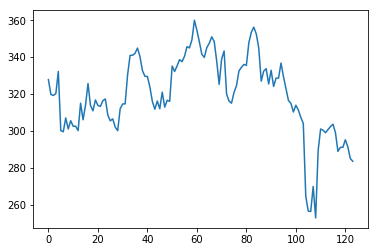

In [3]:
plt.plot(df['Open'])

I'll create three different SVM models to see which one works best. Each model will have a different kernel - Linear, Polynomial and RBF. 

I'll then use the 75% of the data to train the regression models and test the model's prediction on the remaining 25%.

In [4]:
prices = df['Open']
dates = np.reshape(range(len(prices)), (-1,1))

train = int(len(dates)*0.7)
x_train = dates[:train]
x_test = dates[train:]

y_train = prices[:train]
y_test = prices[train:]

svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

svr_lin.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Now for the moment of truth. We shall plot the results to see how the predictions do. 

Training stopped at Day 85


Text(0.5,1,'Support Vector Regression')

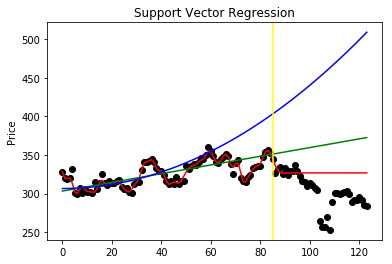

In [8]:
print("Training stopped at Day {}".format(train-1))
plt.scatter(dates, prices, color='black', label='Data')
plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
plt.plot(dates, svr_poly.predict(dates), color='blue', label='Poly model')
plt.axvline(x=train-1, color='yellow')
plt.ylabel('Price')
plt.title('Support Vector Regression')

The black dots represent the real market data. The green line represents the linear kernel, the blue line is the polynomial kernel and the red line is the RBF kernel. Next, note the yellow vertical line. Everything to the left of the vertical line is what we used to train the SVMs. Everything to the right of the line are the predictions. 

As we can see, the RBF kernel fit the data the best (overfit? yeah probably). So let's disregard the other SVMs and look at the one with the RBF kernel more closely:

Text(0.5,1,'Training')

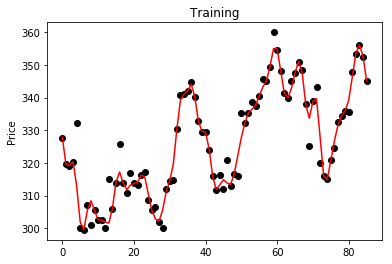

In [10]:
plt.scatter(dates[:train], prices[:train], color='black', label='Data')
plt.plot(dates[:train], svr_rbf.predict(dates[:train]), color='red', label='RBF model')
plt.ylabel('Price')
plt.title('Training')

Text(0.5,1,'Predictions')

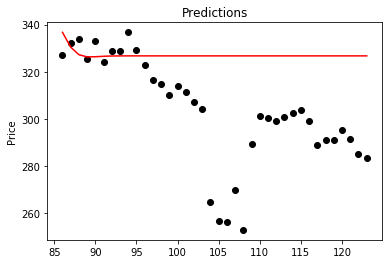

In [11]:
plt.scatter(dates[train:], prices[train:], color='black', label='Data')
plt.plot(dates[train:], svr_rbf.predict(dates[train:]), color='red', label='RBF model')
plt.ylabel('Price')
plt.title('Predictions')

## Analysis
So as we can see in the first plot, the model fit the data quite well. However, the prediction... well, it sucks. 

Why does it suck? Well what regression does is tries to find a relationship between the variables. So in this case, it's trying to find a funciton mapping the day to the price. But, that's not how stocks work. The price of the stock is not very correlated with the day or with how long the stock has existed

When predicting today's price, the model does not take into account yesterday's price or the day before, it's simply trying to use the function it came up with during training. To improve prediction, we'd need to take into account this temporal aspect of the price (ie. that today's price depends somewhat on the prices leading up to today). A better way to do this is through Recurrent Neural Networks (RNNs). In the next project I'll see how well RNN predictions perform. 